In [1]:
# Jupyter Notebook for Predicting Top Category ID using CatBoost

# Import necessary libraries
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib




In [2]:
# Load the dataset
train_df = pd.read_parquet(r'C:\Users\aarek\OneDrive\문서\DCU\ETSY\data\data\2024\train')
test_df = pd.read_parquet(r'C:\Users\aarek\OneDrive\문서\DCU\ETSY\data\data\2024\test')



In [10]:
categorical_features = ['type', 'room', 'craft_type', 'recipient', 'material', 'occasion', 'holiday', 
                        'art_subject', 'style', 'shape', 'pattern', 'title', 'description', 'tags']  # Added 'title', 'description', 'tags' if they weren't included already


In [11]:
# Convert all categorical features to type 'category' to ensure CatBoost handles them properly
for feature in categorical_features:
    train_df[feature] = train_df[feature].astype('category')
    test_df[feature] = test_df[feature].astype('category')

In [12]:
# Split data into features and target
X_train, X_val, y_train, y_val = train_test_split(train_df.drop(columns=['top_category_id', 'top_category_text', 
                                                                         'bottom_category_id', 'bottom_category_text', 
                                                                         'primary_color_id', 'primary_color_text', 
                                                                         'secondary_color_id', 'secondary_color_text', 
                                                                         'image/encoded']),
                                                  train_df['top_category_id'], test_size=0.2, random_state=42)


In [13]:
# Train the model
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=10,
    cat_features=categorical_features,
    eval_metric='TotalF1',
    verbose=100
)
model.fit(X_train, y_train, eval_set=(X_val, y_val), plot=True)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3623664	test: 0.3693907	best: 0.3693907 (0)	total: 24s	remaining: 6h 40m 5s
100:	learn: 0.4781542	test: 0.5072695	best: 0.5072695 (100)	total: 38m 16s	remaining: 5h 40m 41s
200:	learn: 0.4960261	test: 0.5155045	best: 0.5155045 (200)	total: 1h 19m 18s	remaining: 5h 15m 17s
300:	learn: 0.5062658	test: 0.5185668	best: 0.5186124 (278)	total: 2h 3m 13s	remaining: 4h 46m 10s
400:	learn: 0.5153243	test: 0.5197334	best: 0.5198431 (398)	total: 2h 48m 1s	remaining: 4h 10m 59s
500:	learn: 0.5242229	test: 0.5203622	best: 0.5208320 (475)	total: 3h 33m 5s	remaining: 3h 32m 14s
600:	learn: 0.5332761	test: 0.5213968	best: 0.5215326 (596)	total: 4h 17m 49s	remaining: 2h 51m 10s
700:	learn: 0.5424585	test: 0.5214305	best: 0.5221406 (666)	total: 5h 2m 16s	remaining: 2h 8m 55s
800:	learn: 0.5514548	test: 0.5221814	best: 0.5222565 (758)	total: 5h 45m 54s	remaining: 1h 25m 56s
900:	learn: 0.5599097	test: 0.5221188	best: 0.5226143 (897)	total: 6h 30m 31s	remaining: 42m 54s
999:	learn: 0.5680611	t

In [14]:
# Predict on validation and test data
y_pred = model.predict(X_val)
# y_test_pred = model.predict(test_df.drop(columns=['image/encoded']))



In [15]:
# Evaluation
print(classification_report(y_val, y_pred))



              precision    recall  f1-score   support

           0       0.58      0.20      0.29      2497
           1       0.88      0.31      0.46      1680
           2       0.59      0.20      0.30      1308
           3       0.57      0.17      0.26      2266
           4       0.65      0.11      0.18      1239
           5       0.53      0.54      0.53      5911
           6       0.89      0.76      0.82      6779
           7       0.89      0.25      0.39      1469
           8       0.41      0.85      0.56     10941
           9       0.82      0.75      0.78      1656
          10       0.56      0.45      0.50      2390
          11       0.94      0.27      0.42      1222
          12       0.67      0.26      0.38      1735
          13       0.44      0.31      0.37      2758
          14       0.63      0.57      0.60      2074

    accuracy                           0.54     45925
   macro avg       0.67      0.40      0.46     45925
weighted avg       0.62   

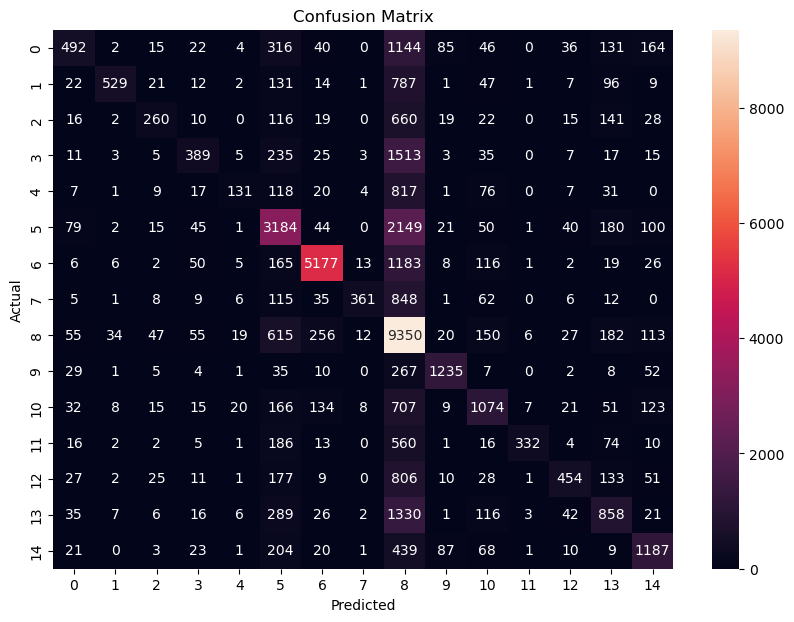

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [17]:
# Save the model and predictions
joblib.dump(model, 'top_category_id_catboost_model.pkl')
predictions = model.predict(test_df.drop(columns=['image/encoded']))
test_df['predicted_top_category_id'] = predictions
test_df[['product_id', 'predicted_top_category_id']].to_csv('top_category_id_predictions.csv', index=False)


In [22]:
predictions

array([[ 6],
       [ 6],
       [ 6],
       ...,
       [10],
       [10],
       [10]], dtype=int64)

In [23]:
# # Save the model for future use
# joblib.dump(model, 'top_category_id_catboost_model.pkl')
checkdf = pd.read_csv("top_category_id_predictions.csv")
checkdf

,product_id,predicted_top_category_id
0,661373440,6
1,1501009290,6
2,1105447030,6
3,1140081090,6
4,793448890,6
...,...,...
25509,869022010,10
25510,954065860,10
25511,1417634130,10
25512,942614980,10


In [19]:
# # Save the predictions for submission or further evaluation
# test_predictions_df = pd.DataFrame({
#     'product_id': test_df['product_id'],
#     'predicted_top_category_id': y_test_pred
# })
# test_predictions_df.to_csv('top_category_id_catboost_predictions.csv', index=False)

# test_predictions_df




In [20]:
# Print completion message
print("Model and predictions saved successfully!")

Model and predictions saved successfully!
